In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
#Loading the CSV File
EV=pd.read_csv(r"C:\Users\VICTUS\Downloads\EV_Dataset.csv")
EV

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0
...,...,...,...,...,...,...,...,...
96840,2023,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1
96841,2023,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5
96842,2023,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0
96843,2023,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0


In [3]:
EV.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0


In [4]:
EV.isna().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [5]:
EV.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [6]:
EV.duplicated().sum()

np.int64(0)

In [7]:
# Assigning Index Name & Starts from 1
EV.index.name = "Id"
EV.index = EV.index+1

In [8]:
EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 1 to 96845
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               96845 non-null  int64 
 1   Month_Name         96845 non-null  object
 2   Date               96845 non-null  object
 3   State              96845 non-null  object
 4   Vehicle_Class      96845 non-null  object
 5   Vehicle_Category   96845 non-null  object
 6   Vehicle_Type       96845 non-null  object
 7   EV_Sales_Quantity  96845 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 5.9+ MB


In [9]:
# Checing data types
EV.dtypes

Year                  int64
Month_Name           object
Date                 object
State                object
Vehicle_Class        object
Vehicle_Category     object
Vehicle_Type         object
EV_Sales_Quantity     int64
dtype: object

In [10]:
# Change Year Column data type 
EV.Year = EV.Year.astype(int)

In [11]:
# The data in the Month_Name column first letter capitalized for better view
EV.Month_Name = EV.Month_Name.str.capitalize()

In [12]:
# Date colum datetype changes into datetime format
EV.Date = pd.to_datetime(EV.Date,format="%m/%d/%Y")

In [13]:
EV.Date

Id
1       2014-01-01
2       2014-01-01
3       2014-01-01
4       2014-01-01
5       2014-01-01
           ...    
96841   2023-12-01
96842   2023-12-01
96843   2023-12-01
96844   2023-12-01
96845   2023-12-01
Name: Date, Length: 96845, dtype: datetime64[ns]

In [14]:
# Change dateype of EV_Sales Quantity Column
EV.EV_Sales_Quantity = EV.EV_Sales_Quantity.astype(int)
EV

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
Id,,,,,,,,
1,2014,Jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
2,2014,Jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
3,2014,Jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0
4,2014,Jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
5,2014,Jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0
...,...,...,...,...,...,...,...,...
96841,2023,Dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1
96842,2023,Dec,2023-12-01,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5
96843,2023,Dec,2023-12-01,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0


In [15]:
#Visulization of data
# Create function for unique value Checking
def unique_value_checking(EV_column):
    print("List of unique values : " ,EV_column.unique())
    print("No of unique values : ", len(EV_column.unique()))

In [16]:
# Year Column checking
unique_value_checking(EV.Year)

List of unique values :  [2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
No of unique values :  11


In [17]:
# Month_Name Column Checking if there Unusual Data
unique_value_checking(EV.Month_Name)

List of unique values :  ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
No of unique values :  12


In [18]:
# Date Column Uniqueness Cheking
unique_value_checking(EV.Date)

List of unique values :  <DatetimeArray>
['2014-01-01 00:00:00', '2015-01-01 00:00:00', '2016-01-01 00:00:00',
 '2017-01-01 00:00:00', '2018-01-01 00:00:00', '2019-01-01 00:00:00',
 '2020-01-01 00:00:00', '2021-01-01 00:00:00', '2022-01-01 00:00:00',
 '2023-01-01 00:00:00',
 ...
 '2014-12-01 00:00:00', '2015-12-01 00:00:00', '2016-12-01 00:00:00',
 '2017-12-01 00:00:00', '2018-12-01 00:00:00', '2019-12-01 00:00:00',
 '2020-12-01 00:00:00', '2021-12-01 00:00:00', '2022-12-01 00:00:00',
 '2023-12-01 00:00:00']
Length: 121, dtype: datetime64[ns]
No of unique values :  121


In [19]:
# State Column Cheking
unique_value_checking(EV.State)

List of unique values :  ['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Andaman & Nicobar Island'
 'Bihar' 'Chhattisgarh' 'Chandigarh' 'DNH and DD' 'Delhi' 'Goa' 'Gujarat'
 'Himachal Pradesh' 'Haryana' 'Jharkhand' 'Karnataka' 'Kerala' 'Ladakh'
 'Maharashtra' 'Meghalaya' 'Madhya Pradesh' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Puducherry' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttarakhand' 'Uttar Pradesh' 'West Bengal' 'Jammu and Kashmir' 'Manipur']
No of unique values :  34


In [20]:
unique_value_checking(EV.Vehicle_Class)

List of unique values :  ['ADAPTED VEHICLE' 'AGRICULTURAL TRACTOR' 'AMBULANCE'
 'ARTICULATED VEHICLE' 'BUS' 'CASH VAN' 'CRANE MOUNTED VEHICLE'
 'EDUCATIONAL INSTITUTION BUS' 'EXCAVATOR (COMMERCIAL)' 'FORK LIFT'
 'GOODS CARRIER' 'HARVESTER' 'MAXI CAB' 'M-CYCLE/SCOOTER' 'MOTOR CAB'
 'MOTOR CAR' 'OMNI BUS' 'PRIVATE SERVICE VEHICLE' 'RECOVERY VEHICLE'
 'THREE WHEELER (PASSENGER)' 'TRACTOR (COMMERCIAL)'
 'TRAILER (AGRICULTURAL)' 'TRAILER (COMMERCIAL)'
 'TRAILER FOR PERSONAL USE' 'VEHICLE FITTED WITH RIG'
 'CAMPER VAN / TRAILER' 'CONSTRUCTION EQUIPMENT VEHICLE (COMMERCIAL)'
 'DUMPER' 'EXCAVATOR (NT)' 'MOPED' 'THREE WHEELER (PERSONAL)'
 'THREE WHEELER (GOODS)' 'EARTH MOVING EQUIPMENT'
 'MOTOR CYCLE/SCOOTER-USED FOR HIRE' 'CONSTRUCTION EQUIPMENT VEHICLE'
 'M-CYCLE/SCOOTER-WITH SIDE CAR' 'MOBILE WORKSHOP'
 'OMNI BUS (PRIVATE USE)' 'VEHICLE FITTED WITH COMPRESSOR'
 'CAMPER VAN / TRAILER (PRIVATE USE)' 'LUXURY CAB'
 'MOTOR CYCLE/SCOOTER-SIDECAR(T)' 'ANIMAL AMBULANCE' 'BREAKDOWN VAN'
 'FIRE FIGHTI

In [21]:
# Cheking Vehicle_Type	Column
unique_value_checking(EV.Vehicle_Type)

List of unique values :  ['Others' 'Bus' 'Institution Bus' '2W_Personal' '4W_Shared' '4W_Personal'
 '3W_Shared' '3W_Personal' '3W_Goods' '2W_Shared' '3W_Shared_LowSpeed'
 '3W_Goods_LowSpeed']
No of unique values :  12


In [22]:
# Checking Vehicle_Category	Column
unique_value_checking(EV.Vehicle_Category)

List of unique values :  ['Others' 'Bus' '2-Wheelers' '4-Wheelers' '3-Wheelers']
No of unique values :  5


In [23]:
# Checking EV_Sales_Quantity Column
unique_value_checking(EV.EV_Sales_Quantity)

List of unique values :  [   0    1   10 ... 1840 2005 5380]
No of unique values :  1447


In [24]:
unique_columns_counts = []
for i in EV.columns:
    unique_columns_counts.append(len(EV[i].unique()))

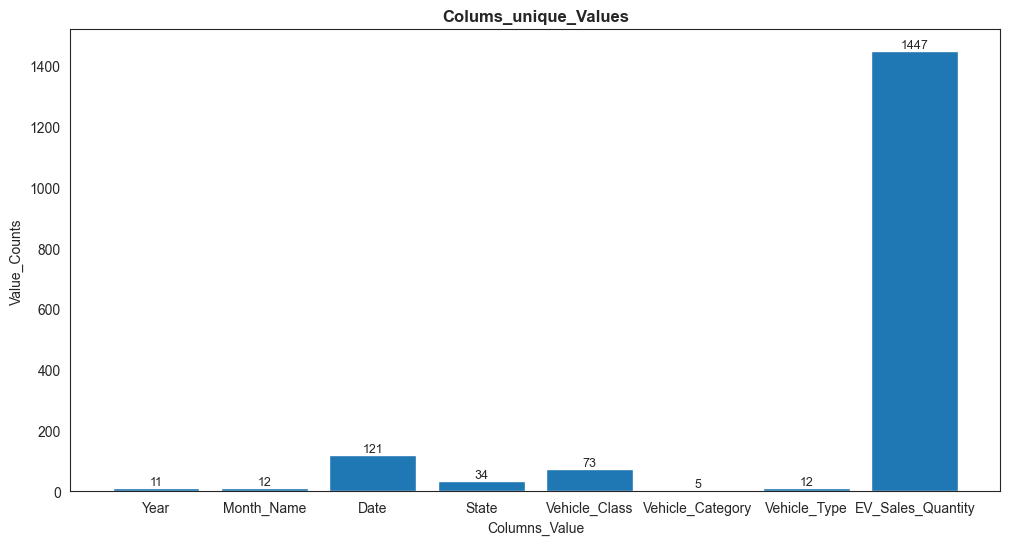

In [25]:
# Bar Graph  for unique Value checking
plt.figure(figsize = (12,6))
sns.set_style("white")
bars = plt.bar(EV.columns,unique_columns_counts)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(bar.get_height()), ha='center', va='bottom', fontsize=9)
plt.title("Colums_unique_Values", fontweight = "bold")
plt.xlabel("Columns_Value")
plt.ylabel("Value_Counts")
plt.show()

In [27]:
# After checking uniqueness, the Vehicle_Type column does not need to be categorized.
EDA_df = EV.drop(columns = "Vehicle_Type")
# Drop rows where EV_Sales_Quantity is 0 to ensure accurate analysis.
list_of_row_deletion = EDA_df.EV_Sales_Quantity[EDA_df.EV_Sales_Quantity == 0].index
EDA_df_filtered = EDA_df.drop(list_of_row_deletion)

In [28]:
# Function for reset index and assign indes name and 
def reset_index(df):
    df = EV.reset_index(drop = True)
    EV.index = EV.index+1
    EV.index.name = "Id"
    return EV

In [29]:
# Reset the index
EDA_df_filtered = reset_index(EDA_df_filtered)

In [30]:
EDA_df_filtered

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
Id,,,,,,,,
2,2014,Jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
3,2014,Jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
4,2014,Jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0
5,2014,Jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
6,2014,Jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0
...,...,...,...,...,...,...,...,...
96842,2023,Dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1
96843,2023,Dec,2023-12-01,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5
96844,2023,Dec,2023-12-01,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0


In [31]:
# we are going to analyse the data from the EDA_df_filtered
EV = EDA_df_filtered.copy()

In [32]:
EV

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
Id,,,,,,,,
2,2014,Jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
3,2014,Jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
4,2014,Jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0
5,2014,Jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
6,2014,Jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0
...,...,...,...,...,...,...,...,...
96842,2023,Dec,2023-12-01,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1
96843,2023,Dec,2023-12-01,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5
96844,2023,Dec,2023-12-01,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0


In [33]:
EV.EV_Sales_Quantity.sum()

np.int64(3593811)

In [34]:
year_wise_sold = EV[["Year","EV_Sales_Quantity"]].groupby(by = "Year").sum()
print(year_wise_sold)

      EV_Sales_Quantity
Year                   
2014               2392
2015               7805
2016              49855
2017              87420
2018             130254
2019             166819
2020             124684
2021             331498
2022            1024723
2023            1525179
2024             143182


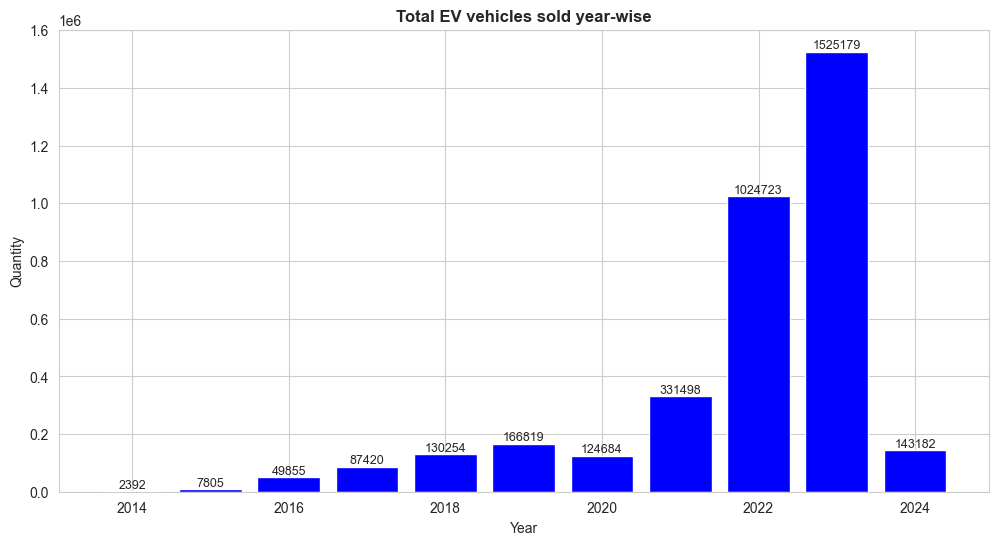

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))
bars = plt.bar(year_wise_sold.index,year_wise_sold.EV_Sales_Quantity, color = "blue")
plt.title("Total EV vehicles sold year-wise", fontweight = 'bold')
plt.xlabel("Year")
plt.ylabel("Quantity")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(bar.get_height()), ha='center', va='bottom', fontsize=9)
plt.show()

In [37]:
month_wise_sold = EV[["Month_Name","EV_Sales_Quantity"]].groupby( by = "Month_Name").sum().sort_values(by = "EV_Sales_Quantity" , ascending =False)
print(month_wise_sold)

            EV_Sales_Quantity
Month_Name                   
Nov                    382217
Dec                    364558
Jan                    360703
Oct                    355083
Sep                    313433
Mar                    299888
Aug                    294022
Jul                    270473
May                    262747
Apr                    232194
Jun                    229754
Feb                    228739


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_13820\3941867950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x = month_wise_sold.index,y = month_wise_sold.EV_Sales_Quantity, data = month_wise_sold, palette = "viridis" )


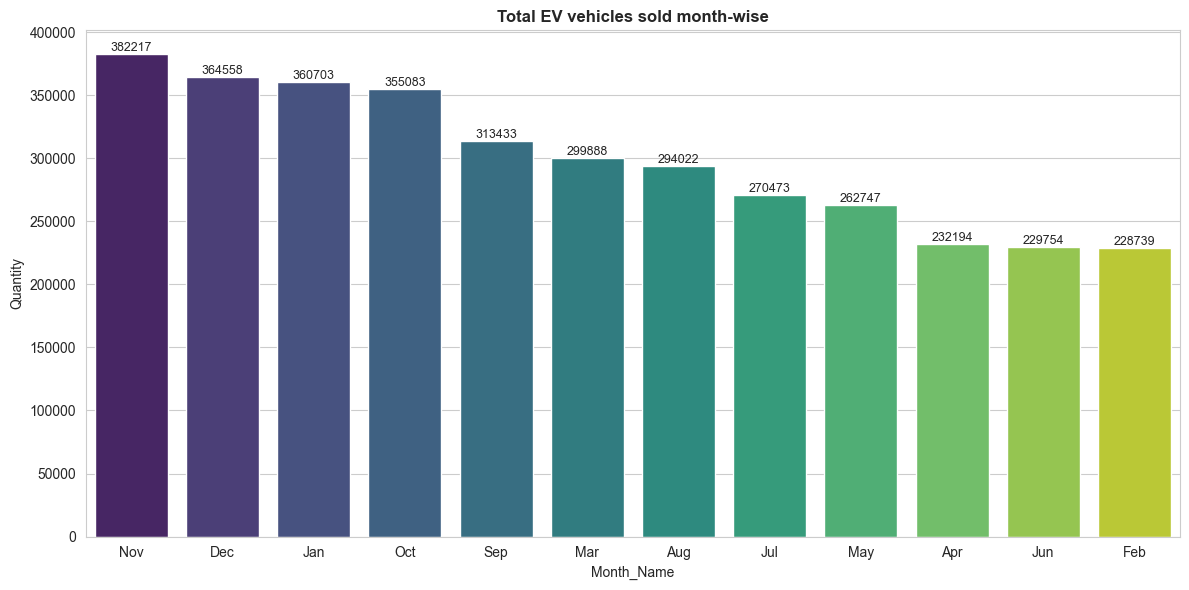

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))
bars = sns.barplot(x = month_wise_sold.index,y = month_wise_sold.EV_Sales_Quantity, data = month_wise_sold, palette = "viridis" )
plt.title("Total EV vehicles sold month-wise", fontweight = 'bold')
plt.xlabel("Month_Name")
plt.ylabel("Quantity")
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.0f}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

In [40]:
date_wise_sold = EV[["Date","EV_Sales_Quantity"]].groupby("Date").sum()
print(date_wise_sold)

            EV_Sales_Quantity
Date                         
2014-01-01                232
2014-02-01                171
2014-03-01                220
2014-04-01                252
2014-05-01                186
...                       ...
2023-09-01             127793
2023-10-01             139232
2023-11-01             152610
2023-12-01             141033
2024-01-01             143182

[121 rows x 1 columns]


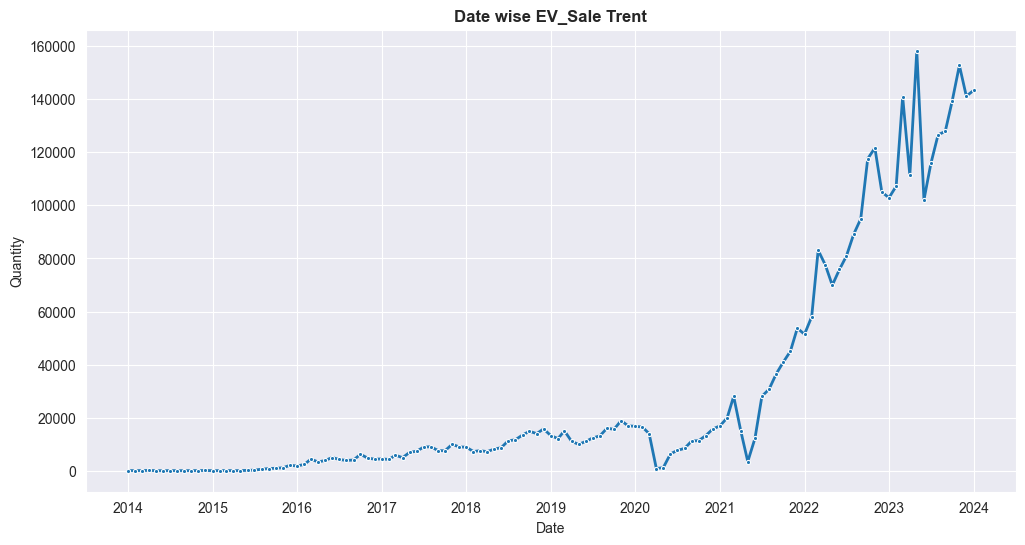

In [41]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,6))
sns.lineplot(x = date_wise_sold.index, y = date_wise_sold.EV_Sales_Quantity, data = date_wise_sold, marker = ".", linewidth = 2)
plt.title("Date wise EV_Sale Trent", fontweight = 'bold')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.grid (True)
plt.show()

In [42]:
State_wise_sold = EV[["State","EV_Sales_Quantity"]].groupby("State").sum().sort_values("EV_Sales_Quantity", ascending = False)
print(State_wise_sold)

                          EV_Sales_Quantity
State                                      
Uttar Pradesh                        732074
Maharashtra                          401535
Karnataka                            315498
Delhi                                268538
Rajasthan                            228573
Bihar                                213465
Tamil Nadu                           206902
Gujarat                              176713
Assam                                151917
Kerala                               133246
Madhya Pradesh                       133182
Odisha                                86823
Haryana                               85250
West Bengal                           78112
Andhra Pradesh                        77356
Chhattisgarh                          75275
Uttarakhand                           57606
Punjab                                49285
Jharkhand                             47871
Tripura                               18346
Goa                             

In [43]:
Vehicle_Class_wise_sold = EV[["Vehicle_Class","EV_Sales_Quantity"]].groupby("Vehicle_Class").sum().sort_values("EV_Sales_Quantity", ascending = False)
print(Vehicle_Class_wise_sold)

                                EV_Sales_Quantity
Vehicle_Class                                    
M-CYCLE/SCOOTER                           1697373
E-RICKSHAW(P)                             1408127
MOTOR CAR                                  130676
E-RICKSHAW WITH CART (G)                    90656
THREE WHEELER (PASSENGER)                   76132
...                                           ...
TOWER WAGON                                     0
TOW TRUCK                                       0
TREE TRIMMING VEHICLE                           0
VEHICLE FITTED WITH GENERATOR                   0
VEHICLE FITTED WITH COMPRESSOR                  0

[73 rows x 1 columns]


In [44]:
Vehicle_Category_wise_sold = EV[["Vehicle_Category","EV_Sales_Quantity"]].groupby("Vehicle_Category").sum()
print(Vehicle_Category_wise_sold)

                  EV_Sales_Quantity
Vehicle_Category                   
2-Wheelers                  1808105
3-Wheelers                  1620310
4-Wheelers                   149775
Bus                            7009
Others                         8612


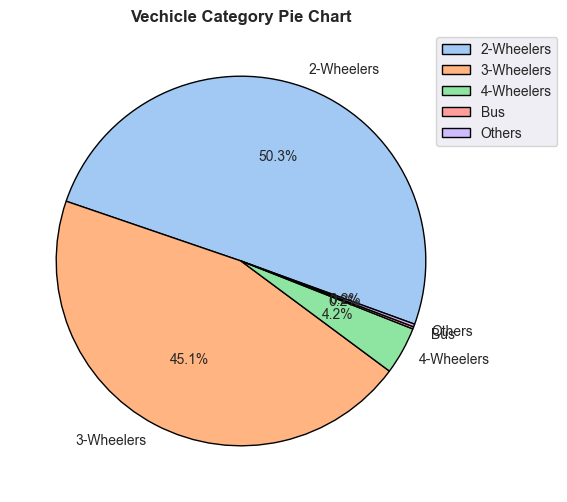

In [45]:
plt.figure(figsize = (7,6))
colors = sns.color_palette("pastel")
plt.pie(Vehicle_Category_wise_sold.EV_Sales_Quantity, labels=Vehicle_Category_wise_sold.index,
        autopct='%1.1f%%', colors = colors , startangle = -20, wedgeprops={'edgecolor': 'black'})
plt.title("Vechicle Category Pie Chart", fontweight = "bold")
plt.legend(Vehicle_Category_wise_sold.index, loc="upper right", bbox_to_anchor=(1.2, 1))

In [46]:
forecast_df = EV[["Year","EV_Sales_Quantity"]].groupby("Year").sum().reset_index()
forecast_df.Year = pd.to_datetime(forecast_df.Year, format = "%Y")
forecast_df = forecast_df.rename(columns={"Year" : "ds", "EV_Sales_Quantity" : "y"})
forecast_df

,ds,y
0,2014-01-01,2392
1,2015-01-01,7805
2,2016-01-01,49855
3,2017-01-01,87420
4,2018-01-01,130254
5,2019-01-01,166819
6,2020-01-01,124684
7,2021-01-01,331498
8,2022-01-01,1024723
9,2023-01-01,1525179


In [47]:
forecast_df = EV[["Year","EV_Sales_Quantity"]].groupby("Year").sum().reset_index()
forecast_df.Year = pd.to_datetime(forecast_df.Year, format = "%Y")
forecast_df = forecast_df.rename(columns={"Year" : "ds", "EV_Sales_Quantity" : "y"})
forecast_df

,ds,y
0,2014-01-01,2392
1,2015-01-01,7805
2,2016-01-01,49855
3,2017-01-01,87420
4,2018-01-01,130254
5,2019-01-01,166819
6,2020-01-01,124684
7,2021-01-01,331498
8,2022-01-01,1024723
9,2023-01-01,1525179


In [48]:
EV= EDA_df[["Vehicle_Class","EV_Sales_Quantity"]]
EV

,Vehicle_Class,EV_Sales_Quantity
Id,,
1,ADAPTED VEHICLE,0
2,AGRICULTURAL TRACTOR,0
3,AMBULANCE,0
4,ARTICULATED VEHICLE,0
5,BUS,0
...,...,...
96841,MOTOR CAR,1
96842,MOTOR CYCLE/SCOOTER-USED FOR HIRE,5
96843,OMNI BUS,0


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_13820\2946623184.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  State_pivot = EDA_df.pivot_table(index = "State", columns = "Year", values = "EV_Sales_Quantity", aggfunc = sum )


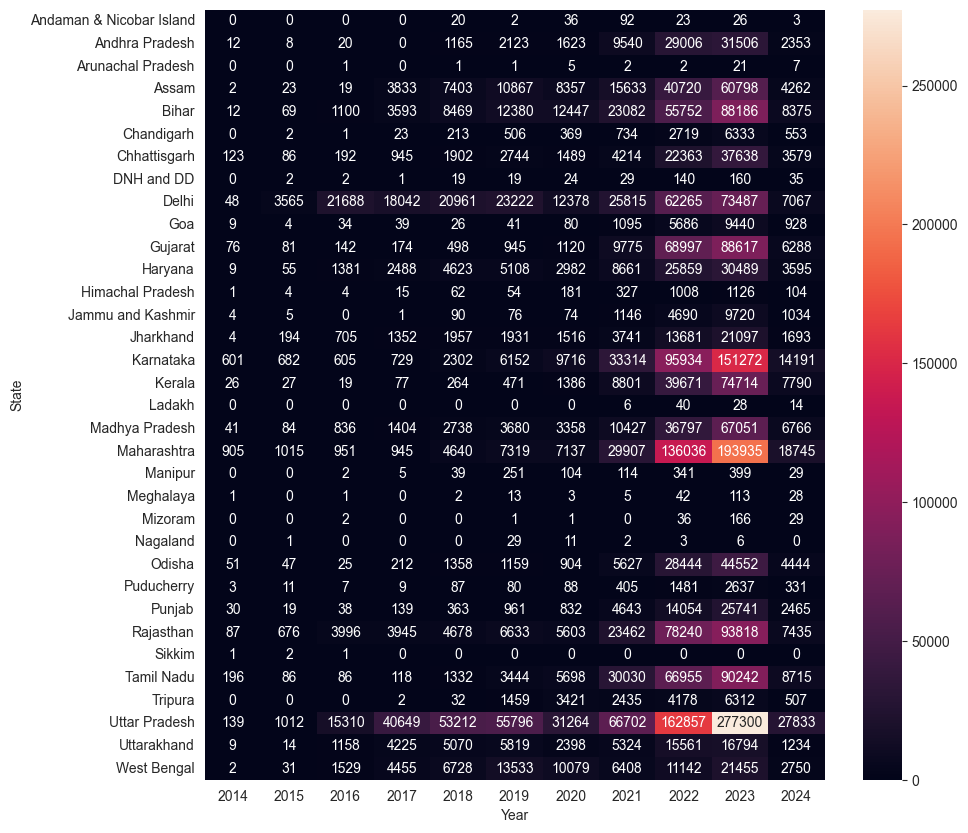

In [49]:
State_pivot = EDA_df.pivot_table(index = "State", columns = "Year", values = "EV_Sales_Quantity", aggfunc = sum )
plt.figure(figsize = (10,10))
sns.heatmap(State_pivot, annot=True, fmt=".0f")
plt.show()

       EV_Sales_Quantity
count          34.000000
mean       105700.323529
std        151862.553604
min             4.000000
25%          1684.500000
50%         53445.500000
75%        147249.250000
max        732074.000000


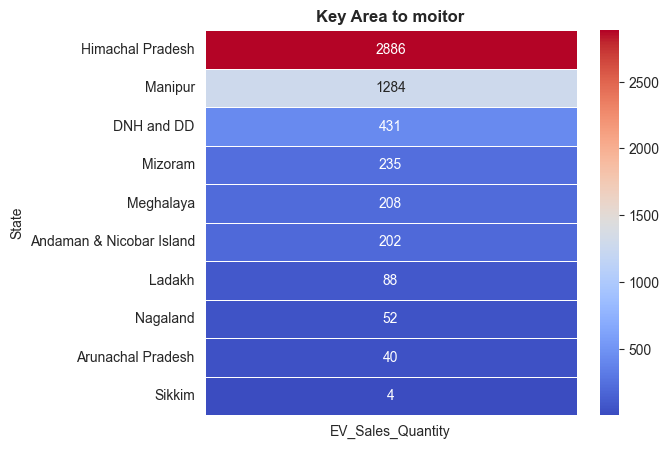

In [50]:
print(State_wise_sold.describe())
plt.figure(figsize = (6,5))
sns.heatmap(State_wise_sold.tail(10),annot=True,cmap="coolwarm",linewidths=0.5,fmt=".0f")
plt.title("Key Area to moitor",fontweight = "bold")
plt.show()

In [51]:
# import Libraries
#build regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
# Convert categorical variable to numeric using encoding

df = pd.get_dummies(EDA_df, columns = ["State", "Vehicle_Class", "Vehicle_Category"],drop_first = True)

# future & target variables

X = df.drop(columns = ["Month_Name", "Date", "EV_Sales_Quantity"])  # independent variable

y = df["EV_Sales_Quantity"] # dependent variable

# split the data to taraining & testing 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
# Train the model

model = LinearRegression() # Initialize
model.fit(X_train, y_train) # Train

LinearRegression()

In [54]:
# Predict sales

y_pred = model.predict(X_test)
y_pred

array([ 38.33714654, -69.13027486,  40.82648384, ..., -25.72674281,
       692.30771158, -41.81431552], shape=(19369,))

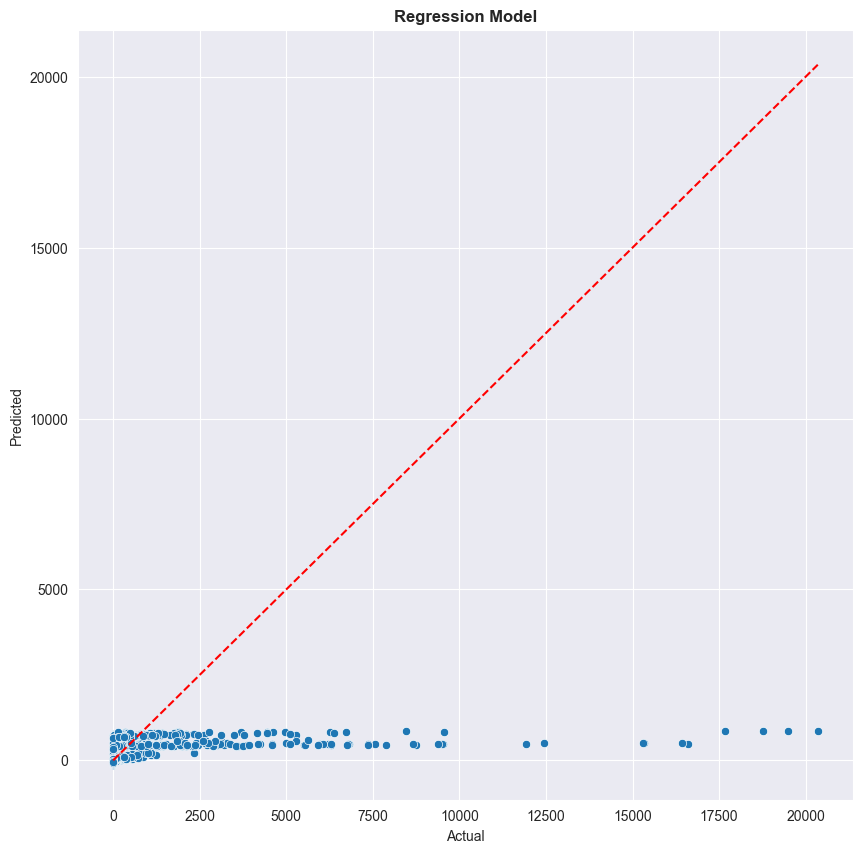

In [55]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,10))
sns.scatterplot( x = y_test, y= y_pred)
sns.lineplot( x = y_test, y = y_test, color = 'red',linestyle = 'dashed')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Regression Model",fontweight = "bold")
plt.show()

Mean Absolute Error: 57.00965423217936
Mean Squared Error: 238857.0735602019
Root Mean Squared Error: 488.7300620590081
R-squared: 0.08275362956131349


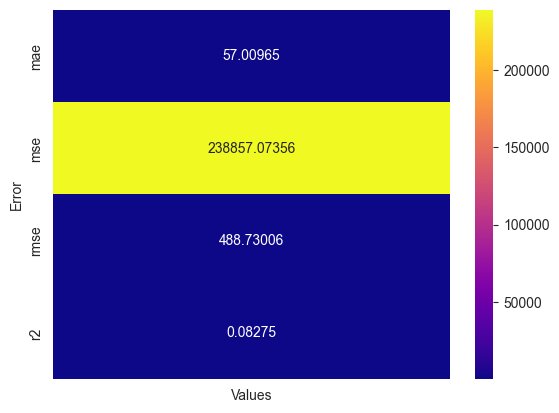

In [63]:
# Calculate errors
mae = float(mean_absolute_error(y_test, y_pred))
mse = float(mean_squared_error(y_test, y_pred))
rmse = float(np.sqrt(mse))
r2 = float((r2_score(y_test, y_pred)))

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Ev = pd.DataFrame ({"Error" : ["mae", "mse", "rmse", "r2"],"Values" : [mae, mse, rmse, r2]})
sns.heatmap(Ev.set_index("Error")[["Values"]], cmap="plasma", annot=True, fmt=".5f")
plt.show()

plt.show()

In [58]:
forecast_df = EDA_df[["Year","EV_Sales_Quantity"]].groupby("Year").sum().reset_index()
forecast_df.Year = pd.to_datetime(forecast_df.Year, format = "%Y")
forecast_df = forecast_df.rename(columns={"Year" : "ds", "EV_Sales_Quantity" : "y"})
forecast_df

,ds,y
0,2014-01-01,2392
1,2015-01-01,7805
2,2016-01-01,49855
3,2017-01-01,87420
4,2018-01-01,130254
5,2019-01-01,166819
6,2020-01-01,124684
7,2021-01-01,331498
8,2022-01-01,1024723
9,2023-01-01,1525179


In [59]:
#evalution the model
from sklearn.metrics import accuracy_score

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 88.91910077160667
RMSE: 484.1535749431743
R² Score: 0.09985146126261435


In [61]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

# Prepare the data for modeling
X = EV.drop(columns=['EV_Sales_Quantity'])
X = pd.get_dummies(X, drop_first=True)
y = EV['EV_Sales_Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()   

model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

57.00965423217936